# Briggs GO
MBTI Test using AI/ML


In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Checking GPU Availability and Tensorflow Version

In [3]:
print(f"Tensorflow Version: {tf.__version__} | GPU Available: {len(tf.config.list_physical_devices('GPU'))}")

Tensorflow Version: 2.6.0 | GPU Available: 1


## Loading Data

In [4]:
df = pd.read_csv("dataset/mbti_1.csv")

In [5]:
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


## Inspecting Data

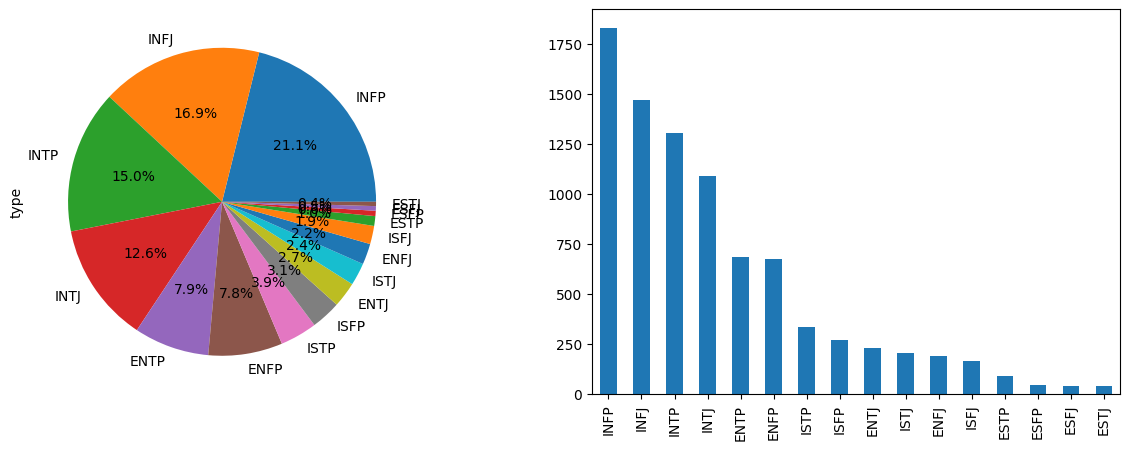

In [11]:
# Plot in Pie and Bar Chart in split by type
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
df['type'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0])
df['type'].value_counts().plot.bar(ax=ax[1])
plt.show()

### Introvert vs Extrovert

In [13]:
df['I/E'] = df['type'].apply(lambda x: x[0])

In [14]:
df['I/E'].value_counts()

I    6676
E    1999
Name: I/E, dtype: int64

<Axes: ylabel='I/E'>

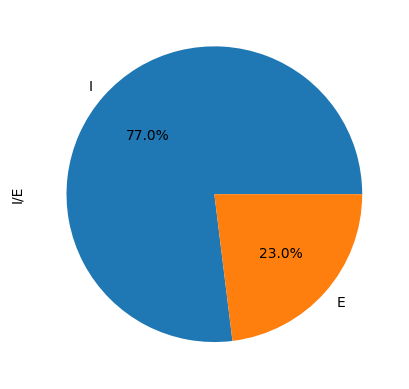

In [15]:
df['I/E'].value_counts().plot.pie(autopct='%1.1f%%')

## Preprocessing Data

### Removing URL

In [16]:
import re

In [17]:
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

In [18]:
df['posts'] = df['posts'].apply(lambda x: remove_url(x))

In [19]:
df.head()

,type,posts,I/E
0,INFJ,' and intj moments sportscenter not top ten...,I
1,ENTP,'I'm finding the lack of me in these posts ver...,E
2,INTP,"'Good one _____ course, to which I say I k...",I
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",I
4,ENTJ,'You're fired.|||That's another silly misconce...,E


### Removing Punctuation

In [20]:
import string

In [21]:
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

In [22]:
df['posts'] = df['posts'].apply(lambda x: remove_punct(x))

In [23]:
df.head()

,type,posts,I/E
0,INFJ,and intj moments sportscenter not top ten ...,I
1,ENTP,Im finding the lack of me in these posts very ...,E
2,INTP,Good one course to which I say I know tha...,I
3,INTJ,Dear INTP I enjoyed our conversation the oth...,I
4,ENTJ,Youre firedThats another silly misconception T...,E
